# Plateforme Agnostique de Traitement et d'Analyse des Textes
### Carnet d'expérimentation
---

## Sujet : Pipeline classif infox supervisé dataset labels

---

# Observations et environnement
---

In [1]:
random_state = 42

In [2]:
cd ../..

/Volumes/Geek/Work/Patat


In [3]:
import ast
import importlib
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm
tqdm.pandas()

In [4]:
import patat.util.pd

filename = 'data/prod/230516-OIDS-Label.pickle'

df_label = pd.read_pickle(filename)

df_label['infox'].isna().sum()

df_label = df_label[df_label['infox'].notna()]

In [5]:
df_label['infox'].isna().sum()

0

In [6]:
df_label = df_label[df_label['infox'].notna()]

In [7]:
df_label.reset_index(inplace=True)

# Experience
---

# Duplicates

In [25]:
df_label[df_label['url'].duplicated()]

,level_0,index,url,site,title,article,tags,paragraphs,date_iso,abstract,...,inversion_preuve,denigrement,degre_infox,observateur,source,p_count,text,c_count,p_size,lemma_text


# Balance Corpus

<Axes: xlabel='infox', ylabel='count'>

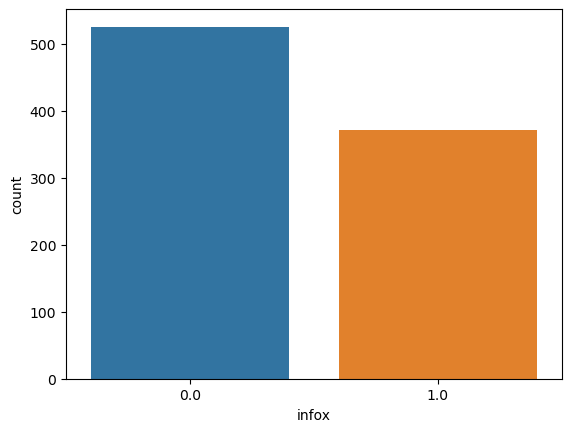

In [27]:
label_count = df_label['infox'].value_counts()
sns.barplot(x=label_count.index, y=label_count)

In [28]:
df_0 = df_label[df_label['infox'] == 0]
df_1 = df_label[df_label['infox'] == 1]

min_sample = min(len(df_0),len(df_1))


df_0=df_0.sample(min_sample,random_state=random_state)
df_1=df_1.sample(min_sample,random_state=random_state)
df_ml = pd.concat([df_0,df_1])

df_ml

,level_0,index,url,site,title,article,tags,paragraphs,date_iso,abstract,...,inversion_preuve,denigrement,degre_infox,observateur,source,p_count,text,c_count,p_size,lemma_text
608,609,610,https://www.francesoir.fr/politique-france/gue...,www.francesoir.fr,Guerre en Ukraine: Emmanuel Macron prévient le...,À l’occasion de la cérémonie pour le 78e anniv...,"[Accueil, Politique]",[À l’occasion de la cérémonie pour le 78e anni...,2022-08-20T00:00:00,,...,0.0,0.0,,CN,Recueil,11,Guerre en Ukraine: Emmanuel Macron prévient le...,2629,239.000000,guerre en ukraine emmanuel macron prévenir les...
709,710,713,https://www.breizh-info.com/2020/10/15/152346/...,www.breizh-info.com,Palmarès du Wildlife Photographer of the Year ...,Les résultats de la 56ème édition du Wildlife ...,"[Environnement, animaux, prix, Wildlife Photog...",[Les résultats de la 56ème édition du Wildlife...,2020-10-15T00:00:00,,...,NaN,NaN,NaN,NaN,Test2,40,Palmarès du Wildlife Photographer of the Year ...,18519,462.975000,palmarès du wildlife photographer of the year ...
26,26,26,https://www.mondialisation.ca/colonialisme-ene...,www.mondialisation.ca,Colonialisme énergétique,Visite d’État du président de la République it...,"[Moyen-Orient et Afrique du Nord, Guerre USA O...",[Visite d’État du président de la République i...,2022-07-09T00:00:00,,...,0.0,NaN,,GP,Recueil,8,Colonialisme énergétique\nVisite d’État du pré...,2794,349.250000,colonialisme énergétique visite état du présid...
422,423,424,https://www.breizh-info.com/2022/07/25/193461/...,www.breizh-info.com,Tyrannie sanitaire. 450 personnes à la confére...,L’anesthésiste réanimateur Louis Fouché a tenu...,"[A La Une, Sociétal, louis fouché, reinfocovid...",[L’anesthésiste réanimateur Louis Fouché a ten...,2022-07-25T00:00:00,,...,0.0,NaN,,FB,Recueil,4,Tyrannie sanitaire. 450 personnes à la confére...,1047,261.750000,tyrannie sanitaire personne la conférence donn...
231,231,232,https://www.polemia.com/quelle-politique-migra...,www.polemia.com,Quelle politique migratoire pour la France ? –...,"Par André-Victor Robert, haut fonctionnaire ♦ ...","[Accueil, Géopolitique, Afrique, analyse, Andr...","[Facebook, Twitter, LinkedIn, Print Friendly, ...",,"Par André-Victor Robert, haut fonctionnaire ♦ ...",...,0.0,0.0,,FB,Recueil,31,Quelle politique migratoire pour la France ? –...,9123,294.290323,quelle politique migratoire pour la france le ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,112,112,https://lesdeqodeurs.fr/des-scientifiques-de-h...,lesdeqodeurs.fr,Des scientifiques de Harvard et de Johns Hopki...,Article original datant du 31/08/22 par SSRNCO...,"[ARNm, COVID, effets secondaires, étude, Harva...",[Les étudiants des universités nord-américaine...,2022-09-23T00:00:00,,...,0.0,0.0,1,FB,Recueil,5,Des scientifiques de Harvard et de Johns Hopki...,1803,360.600000,des scientifique de harvard et de johns hopkin...
157,157,158,https://www.voltairenet.org/article217546.html,www.voltairenet.org,L’armée russe achète des exemplaires d’armemen...,L’achat de deux canons automoteurs CAESAR fran...,[],[L’achat de deux canons automoteurs CAESAR fra...,1900-01-01T00:00:00,,...,1.0,NaN,1,FB,Recueil,3,L’armée russe achète des exemplaires d’armemen...,718,239.333333,armer russe acheter des exemplaire armement de...
521,522,523,https://lemediaen442.fr/onu-le-premier-ministr...,lemediaen442.fr,ONU – Le Premier ministre de Nouvelle-Zélande ...,L’argument principal de la ministre est que le...,"[Politique, Vidéos, censure, jacinda ardern, ONU]",[L’argument principal de la ministre est que l...,2022-09-29T09:56:31+02:00,"Le terrible discours de Jacinda Ardern, Premie...",...,0.0,0.0,1,FB,Recueil,7,ONU – Le Premier ministre de Nouvelle-Zélande ...,2420,345.714286,onu le premier ministre de nouveau zélande dem...
846,848,854,https://www.lelibrepenseur.org/explosion-de-ca...,www.lelibrepenseur.org,Explosion de cas et de décès à Singapour malgr...,Comme vous pouvez le remarquer sur les capture

## Ignore Words

In [29]:
import patat.util.text
import patat.ml.lex_analyser
lex = patat.ml.lex_analyser.LexAnalyser()

### Lemmas

In [30]:
def lemmatize(text):
    return ' '.join(lex.get_lemmas_from_text(patat.util.text.preprocess(text)))

In [31]:
df_label['lemma_text']=df_label['text'].progress_apply(lemmatize)

  0%|          | 0/897 [00:00<?, ?it/s]

In [32]:
df_words = lex.get_df_words(texts= df_label['lemma_text'],values = df_label['infox'].astype(int), preprocessor=None, tokenizer= None)
### Rare Words
for occ_rare in [1,2,3,4,5,6,7]:
    df_words['rare_'+str(occ_rare)]=(df_words['count_0']<=occ_rare)&(df_words['count_1']<=occ_rare)
### Common words
for common_size in [50,80,120,200,500]:
    common_0 = df_words.sort_values('count_0',ascending=False).head(common_size).index
    common_1 = df_words.sort_values('count_1',ascending=False).head(common_size).index
    df_words['common_'+str(common_size)]=(df_words.index.isin(common_0))&(df_words.index.isin(common_1))
### Ignore Lemmas
ignore_lemmas={
    'None' : None,
    'small' : list(df_words[df_words['common_80']].index)+list(df_words[df_words['rare_1']].index),
    'medium' : list(df_words[df_words['common_80']].index)+list(df_words[df_words['rare_2']].index),
    'large' : list(df_words[df_words['common_200']].index)+list(df_words[df_words['rare_5']].index),
    'xlarge' : list(df_words[df_words['common_500']].index)+list(df_words[df_words['rare_7']].index),
}

# Entrainement

In [52]:
df_ml=df_ml.sample(frac=1,random_state=random_state+1)

In [58]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [59]:
logreg = LogisticRegression(C=100, random_state=random_state, solver='lbfgs', multi_class='ovr', max_iter=1000)
neuralnet = MLPClassifier(alpha=1, hidden_layer_sizes=(8,8), max_iter=2000, random_state=random_state)
multi_nb= MultinomialNB(force_alpha=True)

In [60]:
iw = ignore_lemmas['medium']
preprocessor = lemmatize


pipelineLR = Pipeline(steps = [
    ('vectorizer',TfidfVectorizer(preprocessor=preprocessor, tokenizer=None, stop_words=iw)), 
    ('classifier',logreg)
                  ])

pipelineMLPC = Pipeline(steps = [
    ('vectorizer',TfidfVectorizer(preprocessor=preprocessor, tokenizer=None, stop_words=iw)), 
    ('classifier',neuralnet)
                  ])
pipelineMNB = Pipeline(steps = [
    ('vectorizer',TfidfVectorizer(preprocessor=preprocessor, tokenizer=None, stop_words=iw)), 
    ('classifier',multi_nb)
                  ])

In [61]:
X = df_ml['lemma_text']
y = df_ml['infox']

#classifier = pipelineMLPC
classifier = pipelineMNB
scores = cross_validate(classifier, X, y, cv=4,scoring=('accuracy','f1','recall','precision','roc_auc'))
df_scores=pd.DataFrame(scores)
df_scores.mean()

fit_time          0.467094
score_time        0.292193
test_accuracy     0.664400
test_f1           0.744644
test_recall       0.978378
test_precision    0.601184
test_roc_auc      0.855936
dtype: float64

## Entrainement sur tout le dataset

In [30]:
predictor = pipelineLR
predictor.fit(df_label['text'], df_label['infox'])

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(preprocessor=<function preprocess at 0x17c97b160>,
                                 stop_words=['de', 'la', 'le', 'et', 'les',
                                             'des', 'en', 'un', 'est', 'que',
                                             'du', 'une', 'être', 'avoir',
                                             'pour', 'qui', 'dans', 'il', 'par',
                                             'pas', 'sur', 'au', 'ce', 'plaire',
                                             'faire', 'ne', 'qu', 'pouvoir',
                                             'se', 'avec', ...])),
                ('classifier',
                 LogisticRegression(C=5, max_iter=1000, multi_class='ovr',
                                    random_state=42))])

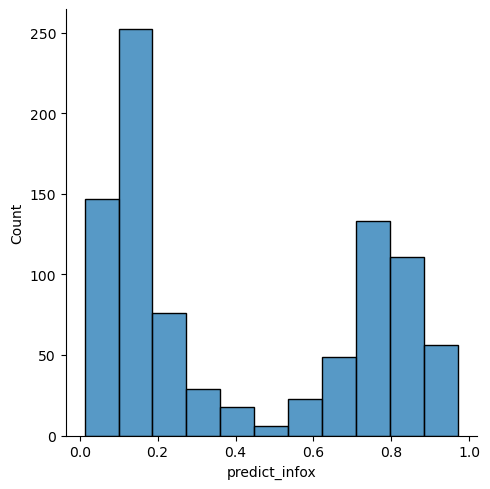

In [31]:
df_label['predict_infox']=predictor.predict_proba(df_label['text'])[:,1]
sns.displot(df_label,x='predict_infox')

# Sauvegarde des résultats
---

# Conclusions
---

# Bricolages
---

In [25]:
import patat.util.file

In [27]:
patat.util.file.pickle_save(common_200,'data/tmp/common_200.pickle')